# Technology shock - Further comments

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt price-flexibility](#toc3_1_)    
    - 3.1.1. [Production firms](#toc3_1_1_)    
    - 3.1.2. [Phillips-curve](#toc3_1_2_)    
    - 3.1.3. [Investments](#toc3_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

C:\Users\nbk863\AppData\Local\Temp\ipykernel_8920\3413739869.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') #create an instance of the model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [5]:
par_eta= 'eta'                                                                  #set parameter 
par_eta_values = [0.,0.1,0.3]                                                   #set parameter values
ModelList_eta = model.multi_model(par_eta,par_eta_values,constant_wage= True)   #create a list of model. One for each value.

Jacobian calculated in 27.0 secs
Jacobian calculated in 26.7 secs
Jacobian calculated in 26.6 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [6]:
Tshock = 50                                                 #length of shock
persistence = 0.80**np.arange(Tshock)                       #persistence of shock   

In [8]:
for i in range(len(ModelList_eta)):
    ModelList_eta[i].set_exo_ss()                                                            #set steady state exogenous variables
    ModelList_eta[i].set_unknowns_ss()                                                       #set steady state unknown variables

    ModelList_eta[i].sol.Gamma[:Tshock] = ModelList_eta[i].ss.Gamma*(1 + 0.01*persistence)   #shock to technology parameter

    ModelList_eta[i].find_IRF()                                                              #find impulse response functions

initial:
t1-t0 = 0.02271 secs
it = 8
    max. abs. error = 4.11e-12
    1.56e-13 in A_R_ini_error
    8.88e-15 in Aq_diff
    1.60e-14 in FOC_capital_agency
    1.61e-13 in FOC_K_ell
    4.11e-12 in mkt_clearing
    3.44e-14 in PC

solve: t1-t0 = 0.08378 secs
evaluate + update: t3-t2 = 0.05884 secs
initial:
t1-t0 = 0.02394 secs
it = 7
    max. abs. error = 8.94e-11
    2.02e-12 in A_R_ini_error
    1.74e-13 in Aq_diff
    4.04e-13 in FOC_capital_agency
    1.60e-12 in FOC_K_ell
    8.94e-11 in mkt_clearing
    3.72e-13 in PC

solve: t1-t0 = 0.08777 secs
evaluate + update: t3-t2 = 0.05984 secs
initial:
t1-t0 = 0.02493 secs
it = 7
    max. abs. error = 8.51e-12
    2.51e-13 in A_R_ini_error
    1.73e-14 in Aq_diff
    3.85e-14 in FOC_capital_agency
    2.22e-13 in FOC_K_ell
    8.51e-12 in mkt_clearing
    6.58e-14 in PC

solve: t1-t0 = 0.08398 secs
evaluate + update: t3-t2 = 0.06256 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt price-flexibility](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Production firms](#toc0_)

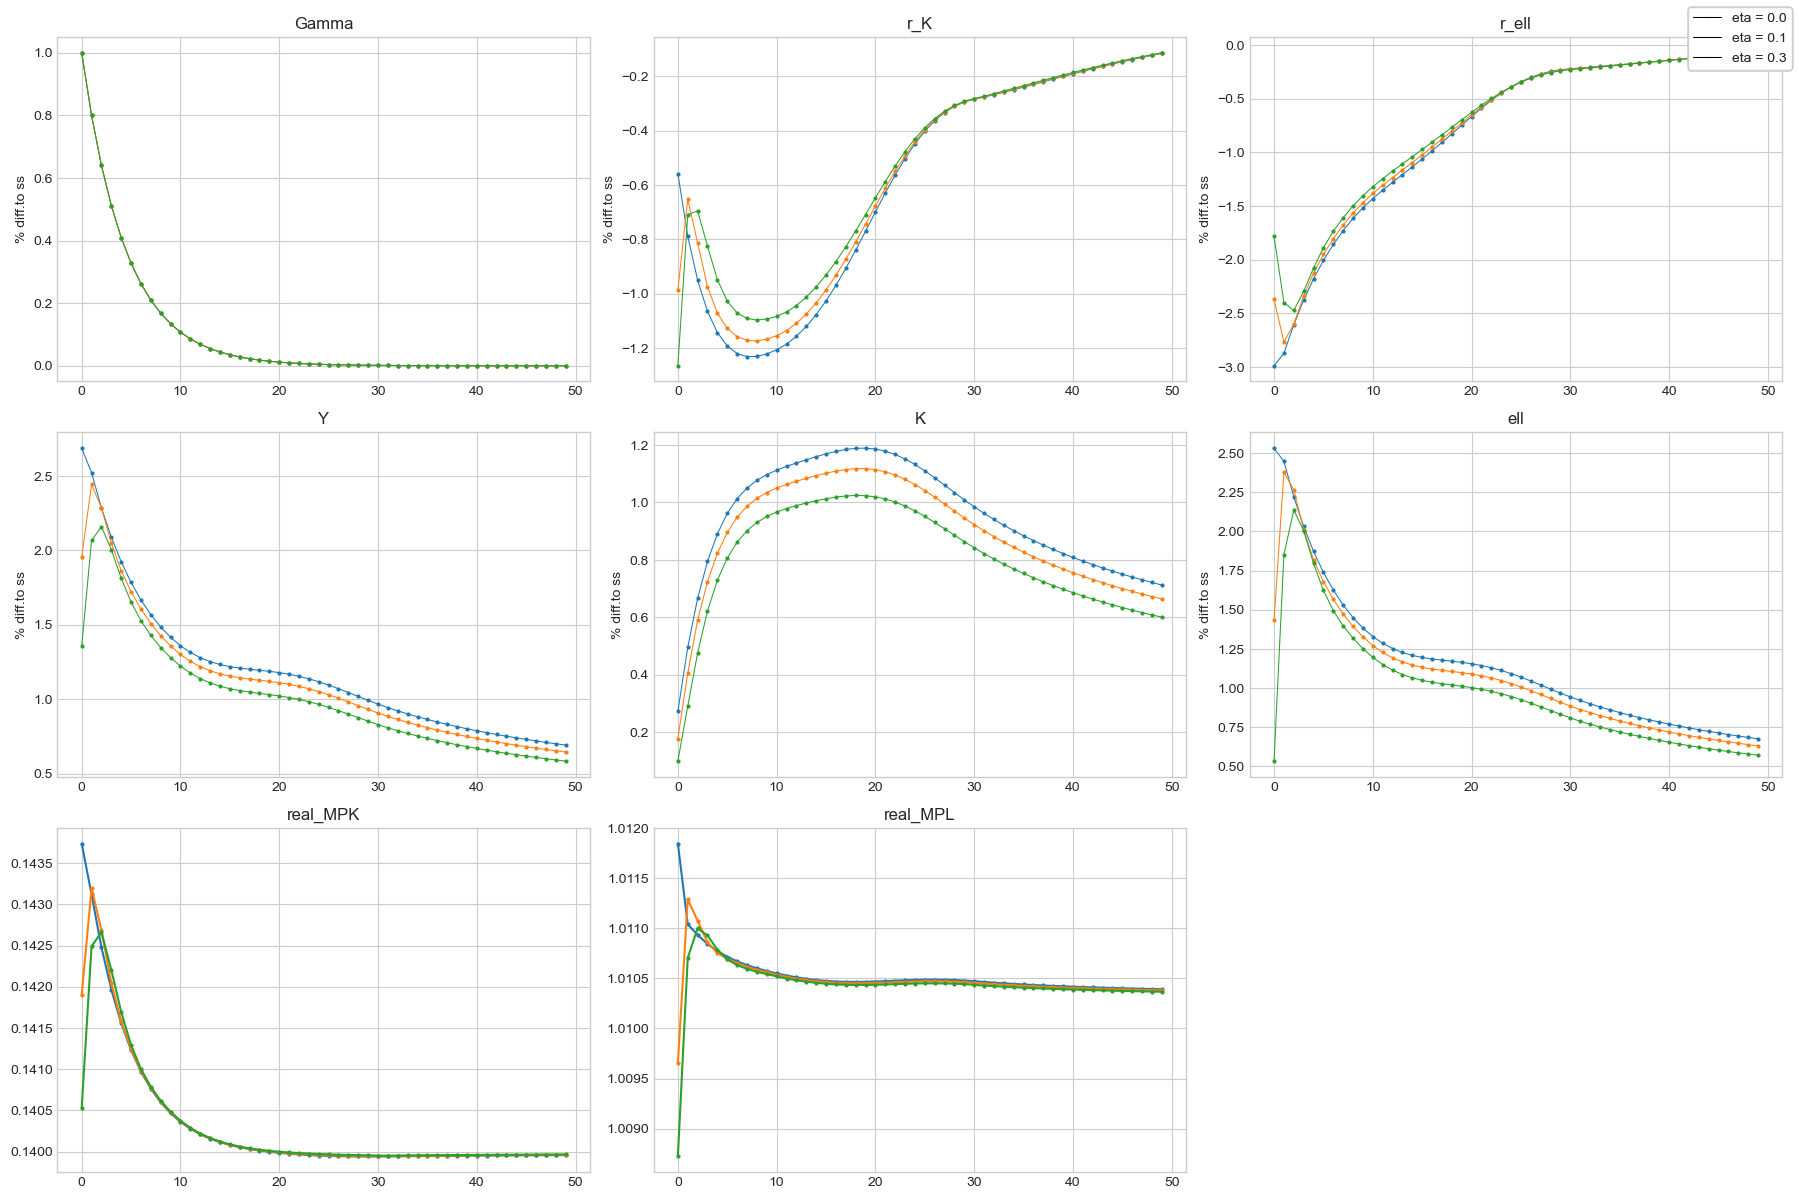

In [9]:
model.plot_IRF_models(ModelList_eta,varlist=['Gamma','r_K','r_ell','Y','K','ell','real_MPK','real_MPL'],ncol=3, abs=['real_MPK','real_MPL'],parameter=par_eta,parvalues=par_eta_values)

#### 3.1.2. <a id='toc3_1_2_'></a>[Phillips-curve](#toc0_)

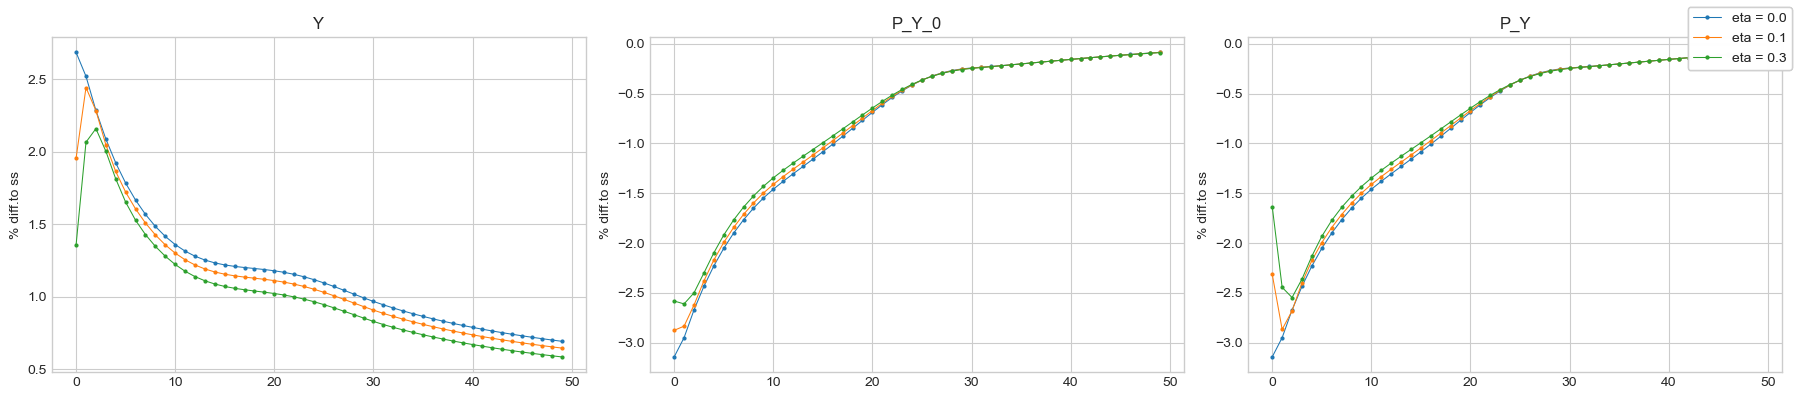

In [10]:
model.plot_IRF_models(ModelList_eta,varlist=['Y','P_Y_0','P_Y'],ncol=3,parameter=par_eta,parvalues=par_eta_values)

#### 3.1.3. <a id='toc3_1_3_'></a>[Investments](#toc0_)

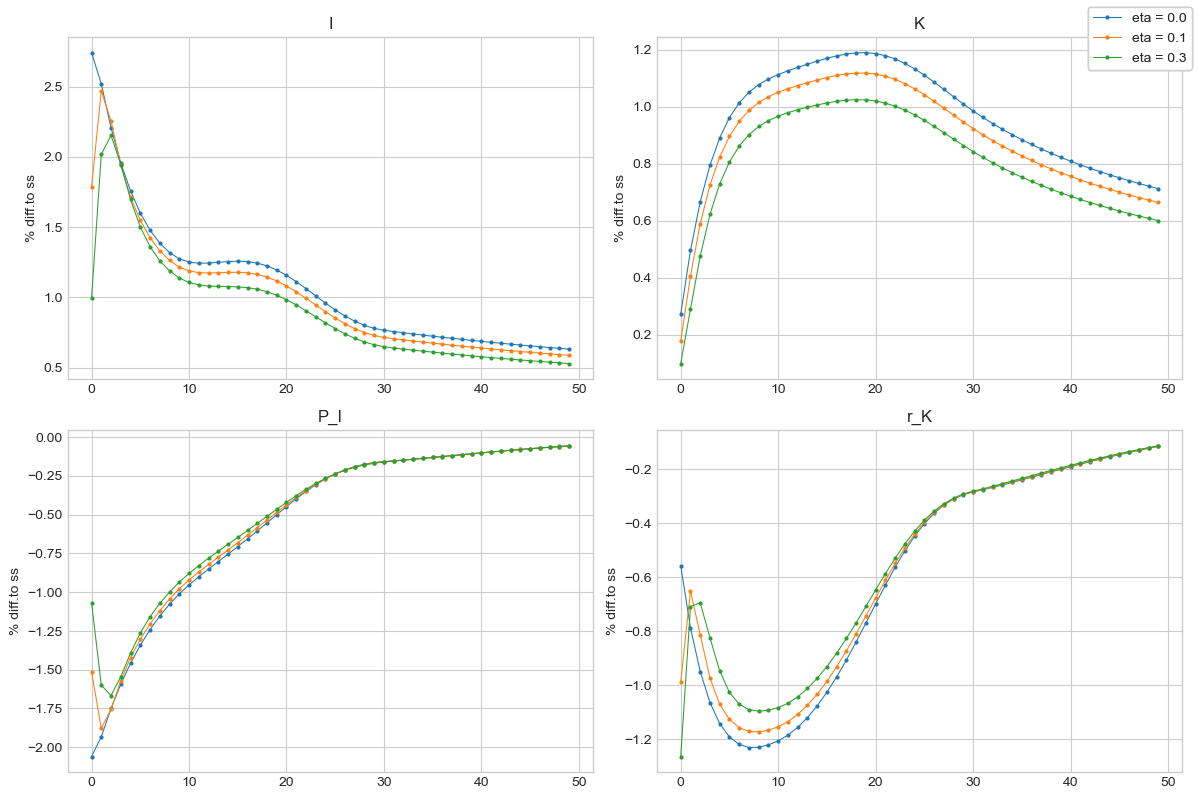

In [11]:
model.plot_IRF_models(ModelList_eta,varlist=['I','K','P_I','r_K'],ncol=2,parameter=par_eta,parvalues=par_eta_values)